In [1]:
# Install gdown jika belum ada
!pip install gdown

# File ID dan nama output
file_id = '1ytXqycvDifybDk5wu-_4ucYE8imtfmaN'
output_file = 'Dataset.zip'

# Generate link download
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download file
!gdown $download_link -O $output_file


Downloading...
From (original): https://drive.google.com/uc?id=1ytXqycvDifybDk5wu-_4ucYE8imtfmaN
From (redirected): https://drive.google.com/uc?id=1ytXqycvDifybDk5wu-_4ucYE8imtfmaN&confirm=t&uuid=629e45e4-985e-4973-afa2-099e112de91f
To: /kaggle/working/Dataset.zip
100%|█████████████████████████████████████████| 326M/326M [00:02<00:00, 112MB/s]


In [2]:
!unzip /kaggle/working/Dataset.zip

Archive:  /kaggle/working/Dataset.zip
   creating: Dataset asli - Copy/
   creating: Dataset asli - Copy/test/
   creating: Dataset asli - Copy/test/bottom/
  inflating: Dataset asli - Copy/test/bottom/474.jpg  
  inflating: Dataset asli - Copy/test/bottom/475.jpg  
  inflating: Dataset asli - Copy/test/bottom/476.jpg  
  inflating: Dataset asli - Copy/test/bottom/477.jpg  
  inflating: Dataset asli - Copy/test/bottom/478.jpg  
  inflating: Dataset asli - Copy/test/bottom/479.jpg  
  inflating: Dataset asli - Copy/test/bottom/480.jpg  
  inflating: Dataset asli - Copy/test/bottom/481.jpg  
  inflating: Dataset asli - Copy/test/bottom/482.jpg  
  inflating: Dataset asli - Copy/test/bottom/483.jpg  
  inflating: Dataset asli - Copy/test/bottom/484.jpg  
  inflating: Dataset asli - Copy/test/bottom/485.jpg  
  inflating: Dataset asli - Copy/test/bottom/486.jpg  
  inflating: Dataset asli - Copy/test/bottom/487.jpg  
  inflating: Dataset asli - Copy/test/bottom/488.jpg  
  inflating: Datas

In [3]:
import os

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub

import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img, img_to_array

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = "/kaggle/working/Dataset asli - Copy/train"

test_dir = "/kaggle/working/Dataset asli - Copy/test"

validation_dir = "/kaggle/working/Dataset asli - Copy/valid"



sorted_labels = [

    'top', 'bottom', 'footwear'

]



# train directories

train_directories = {label: os.path.join(train_dir, label) for label in sorted_labels}



test_directories = {label: os.path.join(test_dir, label) for label in sorted_labels}



# validation directories

validation_directories = {label: os.path.join(validation_dir, label) for label in sorted_labels}



for label in sorted_labels:

    print('Total training', label, 'images:', len(os.listdir(train_directories[label])))



for label in sorted_labels:

    print('Total test', label, 'images:', len(os.listdir(test_directories[label])))



for label in sorted_labels:

    print('Total validation', label, 'images:', len(os.listdir(validation_directories[label])))



top = os.listdir(train_directories['top'])

print(top[:5])

Total training top images: 424
Total training bottom images: 389
Total training footwear images: 257
Total test top images: 158
Total test bottom images: 84
Total test footwear images: 56
Total validation top images: 91
Total validation bottom images: 84
Total validation footwear images: 55
['243.jpg', '113.jpg', '179.jpg', '101.jpg', '314.jpg']


In [8]:
# Feature extractor layer

feature_extractor_url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=[224,224,3])

feature_extractor_layer.trainable = False

In [14]:
# Model

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(224, 224, 3)),  # Gunakan "shape" sebagai pengganti "input_shape"
    tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,331 (5.51 MB)

 Trainable params: 1,443,331 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer= optimizer,

              loss= 'categorical_crossentropy',

              metrics= ['accuracy'])

In [16]:
# Add data-augmentation parameters to ImageDataGenerator
from PIL import Image


train_datagen = ImageDataGenerator(rescale= 1./255,

                                   rotation_range= 50,

                                   width_shift_range= 0.3,

                                   height_shift_range= 0.3,

                                   shear_range= 0.3,

                                   zoom_range= 0.3,

                                   horizontal_flip= True,

                                   fill_mode= 'nearest')




train_generator = train_datagen.flow_from_directory(train_dir,

                                                    batch_size= 32,

                                                    class_mode= 'categorical',

                                                    target_size= (224, 224))



validation_datagen = ImageDataGenerator(rescale = 1./255)



validation_generator = validation_datagen.flow_from_directory(validation_dir,

                                                    batch_size= 32,

                                                    class_mode= 'categorical',

                                                    target_size= (224, 224))

Found 1070 images belonging to 3 classes.
Found 230 images belonging to 3 classes.


In [17]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None and logs.get('accuracy') > 0.9:  # Periksa accuracy
            print("\nReached 90% training accuracy, so cancelling training!")
            self.model.stop_training = True


callbacks = Callback()


history = model.fit(
    train_generator,
    epochs=14,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callbacks]
)


Epoch 1/14


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 360s 10s/step - accuracy: 0.7575 - loss: 0.5646 - val_accuracy: 0.9609 - val_loss: 0.1485
Epoch 2/14
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9324 - loss: 0.2073
Reached 90% training accuracy, so cancelling training!
34/34 ━━━━━━━━━━━━━━━━━━━━ 367s 11s/step - accuracy: 0.9320 - loss: 0.2078 - val_accuracy: 0.9565 - val_loss: 0.1570


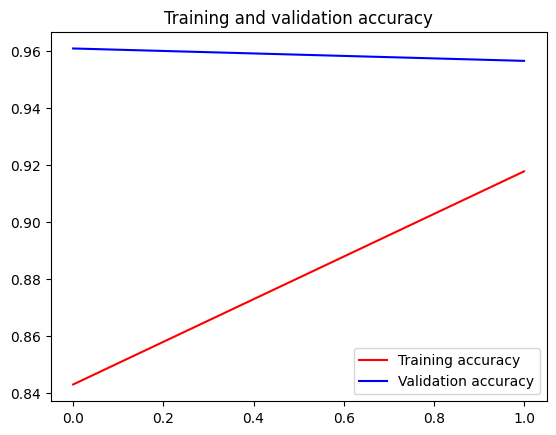

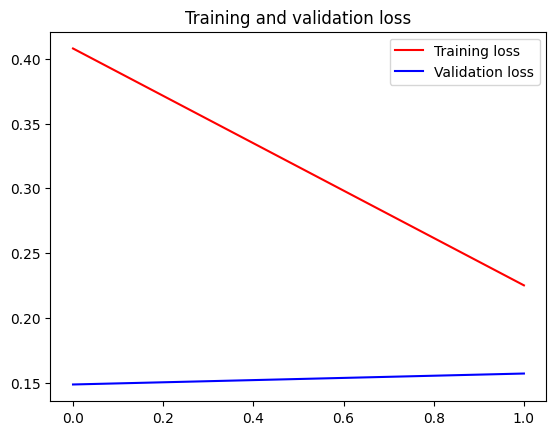

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot the results

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



epochs = range(len(acc))



# Plot the accuracy

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend(loc=0)

plt.figure()



# Plot the loss

plt.plot(epochs, loss, 'r', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend(loc=0)

plt.figure()



plt.show()

In [19]:
from tensorflow.keras.preprocessing import image

# List untuk label yang sudah terurut (sorted_labels harus sudah didefinisikan)
sorted_labels = sorted(os.listdir(test_dir))  # Mendapatkan label berdasarkan nama folder

# Untuk setiap label di direktori test
for label in sorted_labels:
    folder = os.path.join(test_dir, label)

    # Pastikan folder ada dan memiliki file
    if os.path.isdir(folder):
        for path_file in os.listdir(folder):
            path_file = os.path.join(folder, path_file)
            
            # Pastikan file tersebut adalah gambar (dengan ekstensi .jpg atau .png)
            if path_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Memuat gambar dan mengubah ukurannya
                img = image.load_img(path_file, target_size=(512, 512))

                # Mengonversi gambar ke array
                x = img_to_array(img)
                x = x / 255.0  # Normalisasi gambar
                x = np.expand_dims(x, axis=0)  # Menambahkan dimensi batch

                # Melakukan prediksi
                predictions = model.predict(x)

                # Mengambil indeks kelas dengan probabilitas tertinggi
                predicted_class_index = np.argmax(predictions)

                # Mengonversi indeks kelas ke label
                predicted_label = sorted_labels[predicted_class_index]

                # Menampilkan hasil prediksi
                print(f"Image: {path_file}, True Label: {label}, Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/534.jpg, True Label: bottom, Predicted Label: bottom
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/510.jpg, True Label: bottom, Predicted Label: bottom
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/539.jpg, True Label: bottom, Predicted Label: bottom
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/525.jpg, True Label: bottom, Predicted Label: bottom
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/555.jpg, True Label: bottom, Predicted Label: bottom
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/476.jpg, True Label: bottom, Predicted Label: bottom
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
Image: /kaggle/working/Dataset asli - Copy/test/bottom/546.jpg, True Label: bottom

In [ ]:
# Test the model using the uploaded image

from google.colab import files

from PIL import Image as PILImage



uploaded = files.upload()



for fn in uploaded.keys():

  # Get value from image

  path = '/content/' + fn

  img = PILImage.open(path)

  img = image.load_img(path, target_size=(512, 512))



  # Display image

  plt.imshow(img)

  plt.axis('off')

  plt.show()



  x = img_to_array(img)

  x = x/255

  x = np.expand_dims(x, axis=0)



  # Predict the image label

  images = np.vstack([x])

  classes = model.predict(images, batch_size=32)



  # Sort the classes from highest probability

  sorted_classes = np.argsort(classes)[0, ::-1]



  # Print the detected ingredients with a threshold of 0.05

  print("Ingredients detected:")

  for index in sorted_classes:

    label = sorted_labels[index]

    prob = classes[0, index]

    if prob > 0.05:

      print(f"{label}: {prob:.4f}")



  # Delete images after use

  os.remove(path)

In [20]:
# Save the model

model.save("Model.h5")

In [ ]:
# Move the saved model to Google Drive

from google.colab import drive

drive.mount('/content/gdrive')



import shutil



local_file_path = '/content/Model.h5'

drive_path = '/content/gdrive/My Drive/'



shutil.copy(local_file_path, drive_path)